In [1]:
from plotting_helpers import *

## Performance Plots

### Sequential

In [2]:
df_seq_1 = get_sweep_dataframe('w1f4uxpq')  # initial sweep
df_seq_2 = get_sweep_dataframe('a4myvup0')  # small k sweep
df_seq_3 = get_sweep_dataframe('rdf2doxp')  # large k sweep
df_seq = pd.concat([df_seq_1, df_seq_2, df_seq_3]).reset_index()
df_seq.sort_values(['k', 'm'], inplace=True)
epochs = df_seq.epochs[0]

df_seq.head()

,index,run_id,name,state,k,m,p,lr,seed,device,...,preprocess_dataset,_wandb,_runtime,test_acc,test_loss,_timestamp,train_batch_loss,train_epoch_loss,_step,model_save_path
29,29,vdq3di67,cifar10_sequential_k=1_m=1_p=0.5_lr=0.0005_epo...,finished,1,1,0.5,0.0005,282,cuda,...,False,{'runtime': 474},469.286480,0.591591,30.921722,1.682438e+09,0.232046,22.202225,14899200,NaN
28,28,mcgsycvc,cifar10_sequential_k=1_m=8_p=0.5_lr=0.0005_epo...,finished,1,8,0.5,0.0005,282,cuda,...,False,{'runtime': 195},190.592686,0.597759,31.886695,1.682438e+09,0.240193,20.489722,14899200,NaN
27,27,q0quvf66,cifar10_sequential_k=1_m=64_p=0.5_lr=0.0005_ep...,finished,1,64,0.5,0.0005,282,cuda,...,False,{'runtime': 196},193.083843,0.594264,31.861868,1.682438e+09,0.251016,20.506617,14899200,NaN
26,26,g3n4un3n,cifar10_sequential_k=1_m=128_p=0.5_lr=0.0005_e...,finished,1,128,0.5,0.0005,282,cuda,...,False,{'runtime': 190},190.562366,0.598273,32.024158,1.682438e+09,0.205200,19.944481,14899200,NaN
25,25,6a0ljisl,cifar10_sequential_k=1_m=512_p=0.5_lr=0.0005_e...,finished,1,512,0.5,0.0005,282,cuda,...,False,{'runtime': 192},192.508841,0.595086,31.918552,1.682438e+09,0.220083,20.099668,14899200,NaN


In [3]:
# make k value table
k_list = []
for k in df_seq.k.unique():
    epochs_per_mask = k / BATCHES_PER_EPOCH
    if int(epochs_per_mask) == epochs_per_mask:
        epochs_per_mask = str(int(epochs_per_mask))  # these need to be strings because of the mixed types
    else:
        epochs_per_mask = f'{epochs_per_mask:.2f}'
    k_list.append({
        'k': k,
        'Training Epochs Per Mask': epochs_per_mask,
        'Total Masks': epochs * BATCHES_PER_EPOCH // k,
    })
k_table_df = pd.DataFrame(k_list).sort_values('k')


k_table_df.style.hide(axis='index')

k,Training Epochs Per Mask,Total Masks
1,0.01,29100
5,0.05,5820
15,0.15,1940
50,0.52,582
97,1,300
485,5,60
970,10,30
2425,25,12
4850,50,6
9700,100,3


In [4]:
print(k_table_df.style.hide(axis='index').to_latex())

\begin{tabular}{rlr}
k & Training Epochs Per Mask & Total Masks \\
1 & 0.01 & 29100 \\
5 & 0.05 & 5820 \\
15 & 0.15 & 1940 \\
50 & 0.52 & 582 \\
97 & 1 & 300 \\
485 & 5 & 60 \\
970 & 10 & 30 \\
2425 & 25 & 12 \\
4850 & 50 & 6 \\
9700 & 100 & 3 \\
29100 & 300 & 1 \\
\end{tabular}



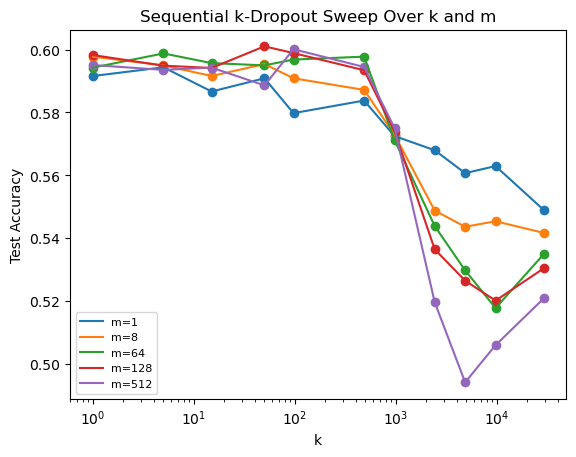

In [5]:
# plot for k
for m in df_seq.m.unique():
    df_filtered = df_seq[df_seq.m == m]
    plt.scatter(df_filtered.k, df_filtered.test_acc)
    plt.plot(df_filtered.k, df_filtered.test_acc, label=f'm={m}')

plt.xscale('log')
plt.title('Sequential k-Dropout Sweep Over k and m')
plt.xlabel('k')
plt.ylabel('Test Accuracy')
plt.legend(fontsize=8, loc='lower left');

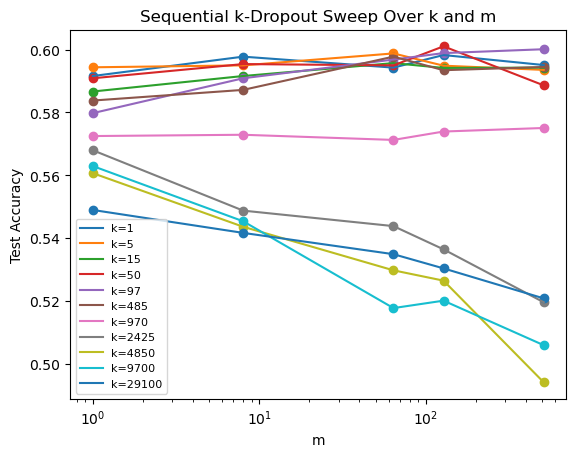

In [6]:
# plot for m
for k in df_seq.k.unique():
    df_filtered = df_seq[df_seq.k == k]
    plt.scatter(df_filtered.m, df_filtered.test_acc)
    plt.plot(df_filtered.m, df_filtered.test_acc, label=f'k={k}')

plt.xscale('log')
plt.title('Sequential k-Dropout Sweep Over k and m')
plt.xlabel('m')
plt.ylabel('Test Accuracy')
plt.legend(fontsize=8, loc='lower left');

### Pooled

In [7]:
df_pool = get_sweep_dataframe('v9lkgy3k')
df_pool = df_pool[df_pool.input_p == 0]  # filter for input_p of 0
df_pool.sort_values(['pool_size', 'm'], inplace=True)

df_pool.head()

,run_id,name,state,k,m,p,lr,seed,device,epochs,...,test_batch_size,preprocess_dataset,_step,_runtime,_timestamp,train_batch_loss,test_acc,test_loss,train_epoch_loss,_wandb
11,ul47kbdo,cifar10_pool_size=1_m=1_p=0.5_lr=0.0005_epochs...,finished,None,1,0.5,0.0005,282,cuda,300,...,512,False,14899200,455.279376,1.683053e+09,0.066920,0.543586,47.008821,4.368204,{'runtime': 459}
3,z4fbx7br,cifar10_pool_size=1_m=8_p=0.5_lr=0.0005_epochs...,finished,None,8,0.5,0.0005,282,cuda,300,...,512,False,14899200,191.516946,1.683055e+09,0.103613,0.545127,46.568242,6.690747,{'runtime': 191}
10,ivs2ap7f,cifar10_pool_size=10_m=1_p=0.5_lr=0.0005_epoch...,finished,None,1,0.5,0.0005,282,cuda,300,...,512,False,14899200,190.004489,1.683053e+09,0.118840,0.553557,50.100914,7.192321,{'runtime': 194}
2,q8ag8ofh,cifar10_pool_size=10_m=8_p=0.5_lr=0.0005_epoch...,running,None,8,0.5,0.0005,282,cuda,300,...,512,False,10146816,326.063518,1.683055e+09,0.091262,0.568257,40.805983,9.202419,NaN
9,u6rh59od,cifar10_pool_size=20_m=1_p=0.5_lr=0.0005_epoch...,finished,None,1,0.5,0.0005,282,cuda,300,...,512,False,14899200,445.910023,1.683053e+09,0.089679,0.574527,49.033963,8.048845,{'runtime': 445}


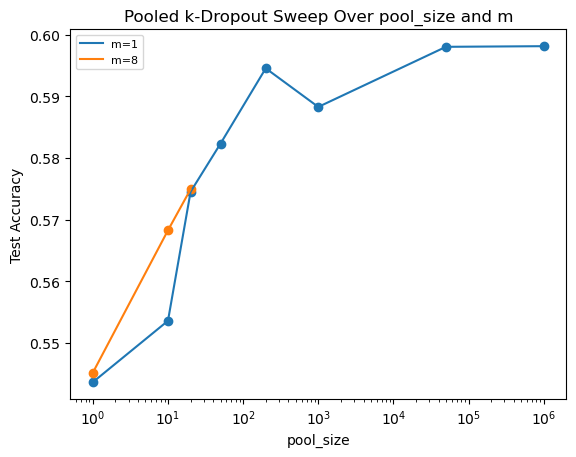

In [8]:
# plot for pool_size
for m in df_pool.m.unique():
    df_filtered = df_pool[df_pool.m == m]
    plt.scatter(df_filtered.pool_size, df_filtered.test_acc)
    plt.plot(df_filtered.pool_size, df_filtered.test_acc, label=f'm={m}')

plt.xscale('log')
plt.title('Pooled k-Dropout Sweep Over pool_size and m')
plt.xlabel('pool_size')
plt.ylabel('Test Accuracy')
plt.legend(fontsize=8);

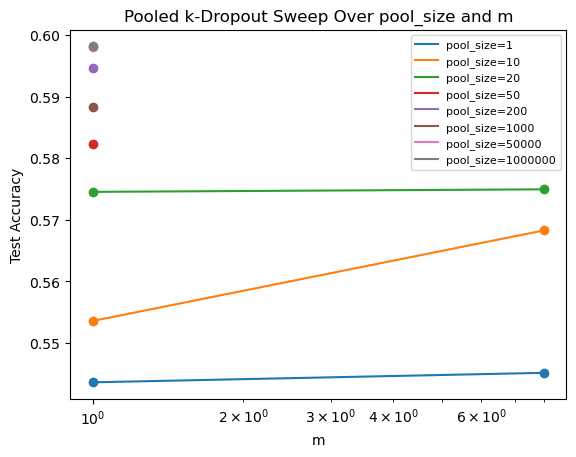

In [9]:
# plot for m
for pool_size in df_pool.pool_size.unique():
    df_filtered = df_pool[df_pool.pool_size == pool_size]
    plt.scatter(df_filtered.m, df_filtered.test_acc)
    plt.plot(df_filtered.m, df_filtered.test_acc, label=f'pool_size={pool_size}')

plt.xscale('log')
plt.title('Pooled k-Dropout Sweep Over pool_size and m')
plt.xlabel('m')
plt.ylabel('Test Accuracy')
plt.legend(fontsize=8);

### Sequential and Pooled Compared

In [10]:
df_bench_no = get_sweep_dataframe('6sxbqxn3')
df_bench_std = get_sweep_dataframe('1xiu49jn')
df_bench_k1_m1 = get_sweep_dataframe('17onv410')
df_bench_seq_1 = get_sweep_dataframe('2pnf6l0e')  # initial sweep
df_bench_seq_2 = get_sweep_dataframe('rwxv6n0g')  # lower k values
df_bench_seq = pd.concat([df_bench_seq_1, df_bench_seq_2]).reset_index()
df_bench_seq.sort_values(['k', 'm'], inplace=True, ascending=[True, False])
# df_bench_pool = get_sweep_dataframe('')  # TODO: run this

len(df_bench_no), len(df_bench_std), len(df_bench_k1_m1), len(df_bench_seq)

(5, 5, 5, 40)

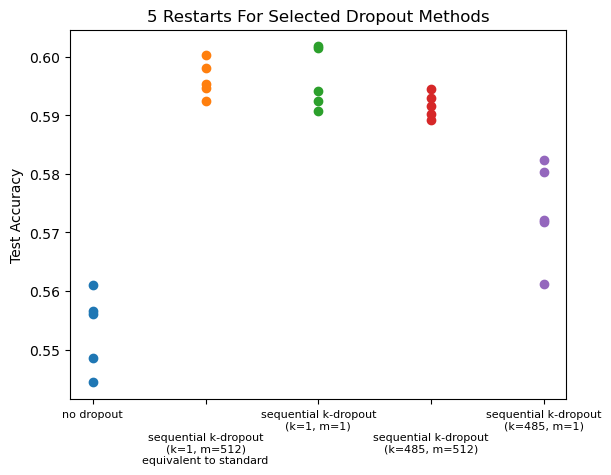

In [11]:
ks = [485]  # NOTE: skipping 5, 97, 29100
ms = [512, 1]

plt.scatter(['no dropout' for _ in range(len(df_bench_no))], df_bench_no.test_acc)
plt.scatter(['sequential k-dropout\n(k=1, m=512)\nequivalent to standard' for _ in range(len(df_bench_std))], df_bench_std.test_acc)
plt.scatter(['sequential k-dropout\n(k=1, m=1)' for _ in range(len(df_bench_k1_m1))], df_bench_k1_m1.test_acc)
for k in ks:
    for m in ms:
        df_filtered = df_bench_seq[(df_bench_seq.k == k) & (df_bench_seq.m == m)]
        plt.scatter([f'sequential k-dropout\n(k={k}, m={m})' for _ in range(len(df_filtered))], df_filtered.test_acc)

plt.title('5 Restarts For Selected Dropout Methods')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=0, fontsize=8);
for tick in plt.gca().xaxis.get_major_ticks()[1::2]:
    tick.set_pad(20)

## Training Dynamics